In [ ]:
cd drive/My Drive/Bhavana_Dataset(AGE)/AngleClosureGlaucomaDataset

/content/drive/My Drive/Bhavana_Dataset(AGE)/AngleClosureGlaucomaDataset


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
from mlxtend.plotting import plot_decision_regions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
glaucoma_data = pd.read_excel('Canny.xlsx')

In [ ]:
glaucoma_data.head()

,contrast,correlation,energy,entropy,homogenity,sumofsquares,sumaverage,sumvariance,sumentropy,differencevariance,differenceentropy,imcorrelation1,imcorrelation2,acw,tial,tiar,class
0,928250,0.753300,0.801406,0.716670,0.941855,0.886792,2.514092,3.114487,0.583549,0.913505,0.403087,-0.391901,0.542982,12.417210,50.713104,54.625850,0
1,658942,0.711066,0.821150,0.625873,0.949750,0.537501,2.372097,1.859234,0.512924,0.709428,0.357538,-0.381970,0.505809,12.766860,44.209367,51.189105,0
2,947877,0.746473,0.782498,0.770662,0.936665,0.881169,2.533454,3.086453,0.626049,0.956439,0.429758,-0.377271,0.548789,11.843102,49.852332,59.431839,0
3,924595,0.733291,0.786068,0.754634,0.937719,0.817043,2.515902,2.841554,0.611829,0.936072,0.423296,-0.385520,0.550093,12.214673,18.855062,24.666811,1
4,751573,0.747450,0.831692,0.613287,0.951359,0.701379,2.420344,2.457875,0.501690,0.752669,0.349479,-0.408857,0.519945,11.875336,85.406289,89.199509,0


In [ ]:
glaucoma_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   contrast            100 non-null    int64  
 1   correlation         100 non-null    float64
 2   energy              100 non-null    float64
 3   entropy             100 non-null    float64
 4   homogenity          100 non-null    float64
 5   sumofsquares        100 non-null    float64
 6   sumaverage          100 non-null    float64
 7   sumvariance         100 non-null    float64
 8   sumentropy          100 non-null    float64
 9   differencevariance  100 non-null    float64
 10  differenceentropy   100 non-null    float64
 11  imcorrelation1      100 non-null    float64
 12  imcorrelation2      100 non-null    float64
 13  acw                 100 non-null    float64
 14  tial                100 non-null    float64
 15  tiar                100 non-null    float64
 16  class    

In [ ]:
glaucoma_data.describe()

,contrast,correlation,energy,entropy,homogenity,sumofsquares,sumaverage,sumvariance,sumentropy,differencevariance,differenceentropy,imcorrelation1,imcorrelation2,acw,tial,tiar,class
count,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,681921.19000,0.716492,0.819442,0.633491,0.949218,0.573512,2.386943,1.990472,0.519160,0.726010,0.360554,-0.382742,0.508171,12.122796,49.254270,51.560224,0.200000
std,103177.47075,0.020636,0.019329,0.065103,0.005808,0.114384,0.062964,0.406865,0.051071,0.093932,0.032379,0.012613,0.026910,0.549334,20.498450,20.260891,0.402015
min,379721.00000,0.604802,0.775076,0.456302,0.936665,0.226453,2.207520,0.767065,0.378784,0.481257,0.270040,-0.418544,0.401025,10.761774,0.985500,0.572960,0.000000
25%,622812.50000,0.706229,0.805765,0.592002,0.944965,0.515251,2.352955,1.792565,0.486425,0.670014,0.338716,-0.387477,0.494873,11.781769,35.188662,37.351593,0.000000
50%,685597.00000,0.715420,0.819261,0.633477,0.949386,0.572460,2.386288,1.989109,0.519474,0.730293,0.360128,-0.382916,0.508947,12.116464,49.732319,53.747425,0.000000
75%,748981.25000,0.728323,0.833026,0.678491,0.953253,0.636348,2.425014,2.191111,0.553189,0.787931,0.384372,-0.377283,0.524610,12.441141,63.138057,65.783244,0.000000
max,947877.00000,0.774945,0.873105,0.791374,0.964867,0.935877,2.578993,3.326548,0.644483,0.956439,0.429758,-0.303767,0.584996,14.212093,97.945941,99.290512,1.000000


In [ ]:
print(glaucoma_data.isnull().sum())

contrast              0
correlation           0
energy                0
entropy               0
homogenity            0
sumofsquares          0
sumaverage            0
sumvariance           0
sumentropy            0
differencevariance    0
differenceentropy     0
imcorrelation1        0
imcorrelation2        0
acw                   0
tial                  0
tiar                  0
class                 0
dtype: int64


In [ ]:
glaucoma_data.shape

(100, 17)

Text(0.5, 1.0, 'Class distributions \n (0 -> No Glaucoma  1 -> Glaucoma)')

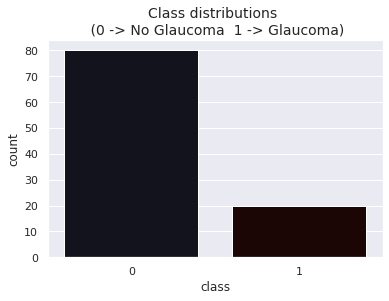

In [ ]:
colors = ["#11111F", "#1F0101"]
sns.countplot('class', data=glaucoma_data, palette=colors)
plt.title('Class distributions \n (0 -> No Glaucoma  1 -> Glaucoma)', fontsize=14)

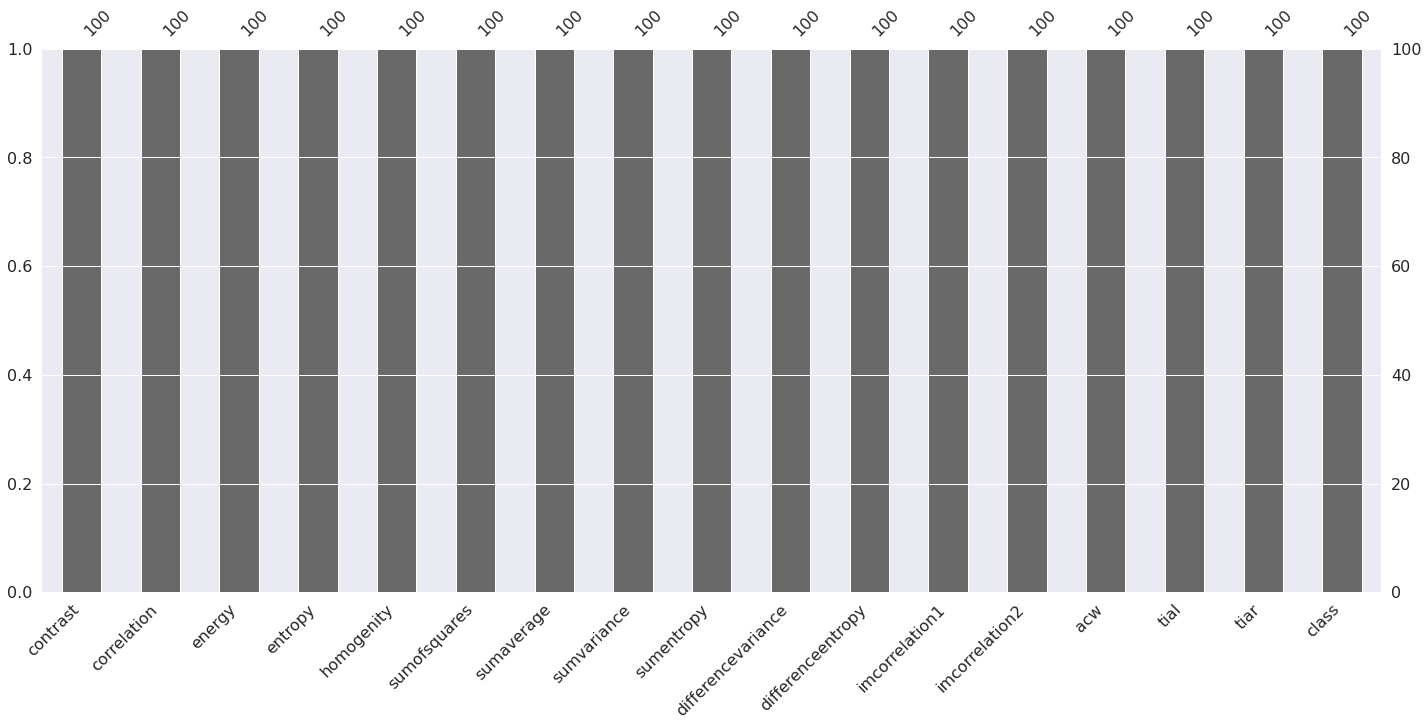

In [ ]:
import missingno as msno
p=msno.bar(glaucoma_data)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(glaucoma_data.drop(["class"],axis = 1),),
        columns=['contrast','correlation','energy','entropy','homogenity','sumofsquares','sumaverage',
                 'sumvariance','sumentropy','differencevariance','differenceentropy','imcorrelation1',
                 'imcorrelation2','acw','tial','tiar'])

In [ ]:
X.head()

,contrast,correlation,energy,entropy,homogenity,sumofsquares,sumaverage,sumvariance,sumentropy,differencevariance,differenceentropy,imcorrelation1,imcorrelation2,acw,tial,tiar
0,2.399456,1.792652,-0.937780,1.284090,-1.274232,2.752634,2.029576,2.776538,1.267125,2.006126,1.320235,-0.729850,1.300114,0.538647,0.071527,0.152070
1,-0.223837,-0.264270,0.088818,-0.117606,0.091917,-0.316412,-0.236977,-0.324183,-0.122729,-0.177413,-0.093637,0.061496,-0.088211,1.178352,-0.247351,-0.018409
2,2.590640,1.460174,-1.920885,2.117605,-2.172338,2.703229,2.338642,2.707290,2.103493,2.465503,2.148102,0.435969,1.516979,-0.511716,0.029323,0.390470
3,2.363853,0.818169,-1.735268,1.870179,-1.989937,2.139783,2.058460,2.102340,1.823650,2.247584,1.947523,-0.221350,1.565685,0.168094,-1.490471,-1.334043
4,0.678469,1.507721,0.636978,-0.311914,0.370479,1.123501,0.533150,1.154578,-0.343797,0.285240,-0.343784,-2.080957,0.439717,-0.452742,1.772531,1.867090


In [ ]:
y = glaucoma_data['class']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42, stratify=y)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
test_scores = []
train_scores = []

for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [ ]:
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Maximum training score = {} % \nk = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Maximum training score = 100.0 % 
k = [1]


In [ ]:
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Maximum testing score = {} % \nk = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Maximum testing score = 95.0 % 
k = [1, 2, 3, 6]


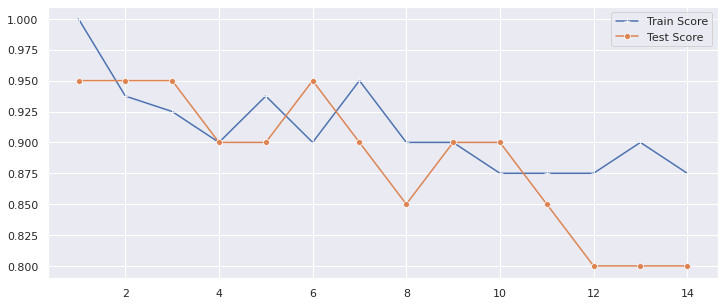

In [ ]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,15),train_scores,marker='+',label='Train Score')
p = sns.lineplot(range(1,15),test_scores,marker='o',label='Test Score')

In [ ]:
knn = KNeighborsClassifier(1)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.95

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,15,1,16
1,0,4,4
All,15,5,20


Text(0.5, 12.5, 'Predicted label')

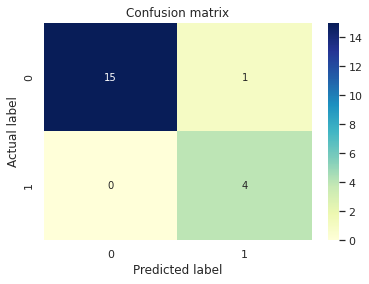

In [ ]:
y_pred = knn.predict(X_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        16
           1       0.80      1.00      0.89         4

    accuracy                           0.95        20
   macro avg       0.90      0.97      0.93        20
weighted avg       0.96      0.95      0.95        20



In [ ]:
from sklearn.metrics import roc_curve
y_pred_proba = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

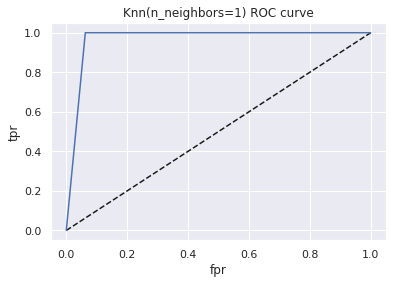

In [ ]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=1) ROC curve')
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.96875